In [1]:
import pandas as pd
import requests
import numpy as np
import random
import quandl

try:
    from dotenv import load_dotenv
    import os

    load_dotenv('.env')
    quandl.ApiConfig.api_key = os.getenv('QUANDL_API_KEY')
except:
    quandl.ApiConfig.api_key = 'YOUR-QUANDL-API-KEY'


# Lecture 7 - Pandas

by Vítek Macháček, inspired by Martin Hronec

* Pan(el) Da(ta)
* go-to package for data analysis in Python
* designed for working with "labeled" (relational data)
* developed by Wes McKinney in 2008 while at AQR Capital Management out of the need for a tool to perform quantitative analysis on financial data (convinced AQR to open-source it)

* two primary data structures:
    * *Series* (1D labeled homogeneously-typed array)
    * *DataFrame* (2D labeled, tabular structure with potentially heterogeneously-typed column)

* built on top of NumPy
* Most of your python data work will start and many of it will end in Pandas.
* Huge ecosystem that built around 

Here are just a few of the things that pandas does well:

* Easy handling of missing data (represented as NaN) in floating point as well as non-floating point data

* Size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects

* Automatic and explicit data alignment: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations

* Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data

* Make it easy to convert ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects

* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets

* Intuitive merging and joining data sets

* Flexible reshaping and pivoting of data sets

* Hierarchical labeling of axes (possible to have multiple labels per tick)

* Robust IO tools for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format

* Time series-specific functionality: date range generation and frequency conversion, moving window statistics, date shifting and lagging.



## Series - 1D, one datatype

* index
* values
* name
* dtype
* shape

In [2]:
s = pd.Series(30,index=['Vítek','Martin','Honza'],name='Age')
s

Vítek     30
Martin    30
Honza     30
Name: Age, dtype: int64

In [3]:
print('Name: ' + s.name)
print('Numpy: ' + str(s.values))
print('Index: ' +str(s.index))
print('dtype: ' + str(s.dtype))
print('shape: ' + str(s.shape))

Name: Age
Numpy: [30 30 30]
Index: Index(['Vítek', 'Martin', 'Honza'], dtype='object')
dtype: int64
shape: (3,)


Series can be created using:
* `dict`

In [4]:
pd.Series({'Vítek':31,'Martin':30, 'Honza':30})

Vítek     31
Martin    30
Honza     30
dtype: int64

* iterable

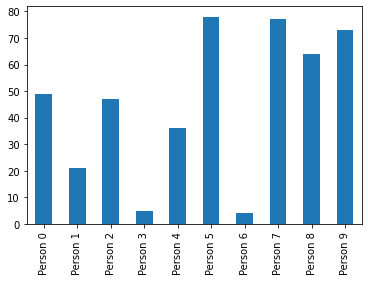

In [5]:
l = range(10)
s = pd.Series(np.random.randint(100,size=(10,)),index=[f'Person {i}' for i in l],name='Age')
s.plot.bar()

In [6]:
s

Person 0    49
Person 1    21
Person 2    47
Person 3     5
Person 4    36
Person 5    78
Person 6     4
Person 7    77
Person 8    64
Person 9    73
Name: Age, dtype: int32

* scalar

In [7]:
pd.Series(np.nan,index=['Vítek','Martin','Honza'],name='NANs')

Vítek    NaN
Martin   NaN
Honza    NaN
Name: NANs, dtype: float64

## Indexing data
### Using `loc` - select using `index`

In [8]:
s.loc['Person 2']

47

In [9]:
s.loc[['Person 0','Person 5']]

Person 0    49
Person 5    78
Name: Age, dtype: int32

In [10]:
s.loc[[f'Person {i}' for i in range(3,8,2)]]

Person 3     5
Person 5    78
Person 7    77
Name: Age, dtype: int32

In [11]:
s.loc['Person 2'] = 50
s

Person 0    49
Person 1    21
Person 2    50
Person 3     5
Person 4    36
Person 5    78
Person 6     4
Person 7    77
Person 8    64
Person 9    73
Name: Age, dtype: int32

In [12]:
s.loc[['Person 1','Person 5']] = [0,0]
s

Person 0    49
Person 1     0
Person 2    50
Person 3     5
Person 4    36
Person 5     0
Person 6     4
Person 7    77
Person 8    64
Person 9    73
Name: Age, dtype: int32

### Using `iloc` - select by order in the series. Try to avoid.

In [13]:
order = [i for i in range(9,4,-1)]
print(order)
s.iloc[order]

[9, 8, 7, 6, 5]


Person 9    73
Person 8    64
Person 7    77
Person 6     4
Person 5     0
Name: Age, dtype: int32

### subsetting using `mask` - conditional on value of series

In [14]:
s[s>75]

Person 7    77
Name: Age, dtype: int32

In [18]:
s[~(s==0)]

Person 0    49
Person 2    50
Person 3     5
Person 4    36
Person 6     4
Person 7    77
Person 8    64
Person 9    73
Name: Age, dtype: int32

In [19]:
s[s%10 == 0]

Person 1     0
Person 2    50
Person 5     0
Name: Age, dtype: int32

## `pd.DataFrame()` - 2D, more `pd.Series`

In [20]:
age = pd.Series(np.random.randint(100,size=(10,)),index=[f'Person {i}' for i in l],name='Age')
gender = pd.Series(np.random.choice(['M','F',np.nan],size=(10,)),index=[f'Person {i}' for i in l],name='Gender').sample(frac=1)
nat = pd.Series(np.random.choice(['CZ','SK','US'],size=(10,)),index=[f'Person {i}' for i in l],name='Nationality').sample(frac=1)
age, nat, gender

(Person 0    43
 Person 1    35
 Person 2    75
 Person 3    59
 Person 4    80
 Person 5    13
 Person 6    81
 Person 7    63
 Person 8    57
 Person 9     2
 Name: Age, dtype: int32,
 Person 6    CZ
 Person 8    CZ
 Person 5    CZ
 Person 3    US
 Person 2    SK
 Person 9    CZ
 Person 4    SK
 Person 1    SK
 Person 0    CZ
 Person 7    US
 Name: Nationality, dtype: object,
 Person 3      M
 Person 9    nan
 Person 2      F
 Person 5    nan
 Person 7      F
 Person 0    nan
 Person 8      F
 Person 6      F
 Person 4      M
 Person 1      F
 Name: Gender, dtype: object)

### `list` into `pd.DataFrame` constructor: row-wise

list elements can be:

* iterable with values
* `pd.Series`
* `dict`

In [21]:
pd.DataFrame([age,nat,gender])

,Person 0,Person 1,Person 2,Person 3,Person 4,Person 5,Person 6,Person 7,Person 8,Person 9
Age,43,35,75,59,80,13,81,63,57,2
Nationality,CZ,SK,SK,US,SK,CZ,CZ,US,CZ,CZ
Gender,nan,F,F,M,M,nan,F,F,F,nan


### `dict` into `pd.DataFrame` constructor: column-wise

* Keys will become column names
* Values are values - must be iterables (`list`, `tuple`, `pd.Series`)

In [23]:
df = pd.DataFrame({s.name:s,nat.name:nat,gender.name:gender})
df

,Age,Nationality,Gender
Person 0,49,CZ,nan
Person 1,0,SK,F
Person 2,50,SK,F
Person 3,5,US,M
Person 4,36,SK,M
Person 5,0,CZ,nan
Person 6,4,CZ,F
Person 7,77,US,F
Person 8,64,CZ,F
Person 9,73,CZ,nan


In [24]:
df.T

,Person 0,Person 1,Person 2,Person 3,Person 4,Person 5,Person 6,Person 7,Person 8,Person 9
Age,49,0,50,5,36,0,4,77,64,73
Nationality,CZ,SK,SK,US,SK,CZ,CZ,US,CZ,CZ
Gender,nan,F,F,M,M,nan,F,F,F,nan


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Person 0 to Person 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          10 non-null     int32 
 1   Nationality  10 non-null     object
 2   Gender       10 non-null     object
dtypes: int32(1), object(2)
memory usage: 600.0+ bytes


In [26]:
df.describe()

,Age
count,10.000000
mean,35.800000
std,31.226057
min,0.000000
25%,4.250000
50%,42.500000
75%,60.500000
max,77.000000


## Real-world data
use quandl

In [27]:
fb = quandl.get('WIKI/FB')
type(fb)

pandas.core.frame.DataFrame

In [28]:
fb.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,164.80,173.40,163.30,169.39,105350867.0,0.0,1.0,164.80,173.40,163.30,169.39,105350867.0
2018-03-22,166.13,170.27,163.72,164.89,73389988.0,0.0,1.0,166.13,170.27,163.72,164.89,73389988.0
2018-03-23,165.44,167.10,159.02,159.39,52306891.0,0.0,1.0,165.44,167.10,159.02,159.39,52306891.0
2018-03-26,160.82,161.10,149.02,160.06,125438294.0,0.0,1.0,160.82,161.10,149.02,160.06,125438294.0
2018-03-27,156.31,162.85,150.75,152.19,76787884.0,0.0,1.0,156.31,162.85,150.75,152.19,76787884.0


In [29]:
fb.shape

(1472, 12)

In [30]:
fb.index

DatetimeIndex(['2012-05-18', '2012-05-21', '2012-05-22', '2012-05-23',
               '2012-05-24', '2012-05-25', '2012-05-29', '2012-05-30',
               '2012-05-31', '2012-06-01',
               ...
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27'],
              dtype='datetime64[ns]', name='Date', length=1472, freq=None)

In [31]:
fb.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

In [33]:
fb.dtypes

Open           float64
High           float64
Low            float64
Close          float64
Volume         float64
Ex-Dividend    float64
Split Ratio    float64
Adj. Open      float64
Adj. High      float64
Adj. Low       float64
Adj. Close     float64
Adj. Volume    float64
dtype: object

Rows are `pd.Series`

In [34]:
fb.iloc[0]

Open           4.205000e+01
High           4.500000e+01
Low            3.800000e+01
Close          3.823180e+01
Volume         5.735764e+08
Ex-Dividend    0.000000e+00
Split Ratio    1.000000e+00
Adj. Open      4.205000e+01
Adj. High      4.500000e+01
Adj. Low       3.800000e+01
Adj. Close     3.823180e+01
Adj. Volume    5.735764e+08
Name: 2012-05-18 00:00:00, dtype: float64

as well as columns

In [40]:
fb.loc['2015-01-02':'2015-12-31','Open']

Date
2015-01-02     78.58
2015-01-05     77.98
2015-01-06     77.23
2015-01-07     76.76
2015-01-08     76.74
               ...  
2015-12-24    104.74
2015-12-28    105.02
2015-12-29    106.42
2015-12-30    107.00
2015-12-31    106.00
Name: Open, Length: 252, dtype: float64

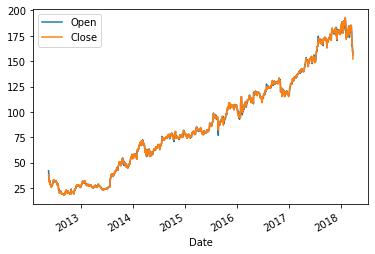

In [41]:
fb[['Open','Close']].plot()

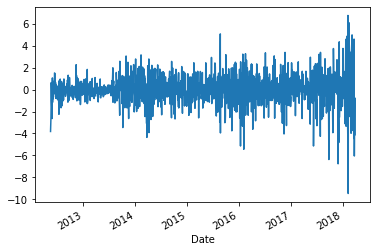

In [44]:
(fb.Close - fb.Open).plot()

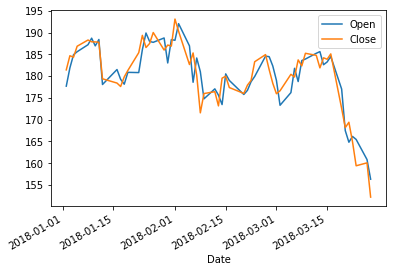

In [45]:
fb.loc['2018-01-01':,['Open','Close']].plot()

## Deeper look at the index

In [46]:
fb.index

DatetimeIndex(['2012-05-18', '2012-05-21', '2012-05-22', '2012-05-23',
               '2012-05-24', '2012-05-25', '2012-05-29', '2012-05-30',
               '2012-05-31', '2012-06-01',
               ...
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27'],
              dtype='datetime64[ns]', name='Date', length=1472, freq=None)

In [47]:
fb.index.values

array(['2012-05-18T00:00:00.000000000', '2012-05-21T00:00:00.000000000',
       '2012-05-22T00:00:00.000000000', ...,
       '2018-03-23T00:00:00.000000000', '2018-03-26T00:00:00.000000000',
       '2018-03-27T00:00:00.000000000'], dtype='datetime64[ns]')

In [49]:
fb.index.dtype

dtype('<M8[ns]')

## Dtypes

* Numeric - `int64` and `float64`
* Datetime - `datetime64[ns]`
    * Datetimes can be timezone-aware
    * variable precision

    * see `pd.to_datetime`
* Object - everything else
    * most often `str`
    * But also `list` or virtually anything

* Custom specialized datatypes 
    * `geometry` in `geopandas`

## Path to `MultiIndex`
https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html

In [50]:
# set up a new column Ticker
fb['Ticker'] = 'FB'

# move it from column to index
fb = fb.reset_index().set_index(['Date','Ticker'])

fb

,,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,Ticker,,,,,,,,,,,,
2012-05-18,FB,42.05,45.00,38.00,38.2318,573576400.0,0.0,1.0,42.05,45.00,38.00,38.2318,573576400.0
2012-05-21,FB,36.53,36.66,33.00,34.0300,168192700.0,0.0,1.0,36.53,36.66,33.00,34.0300,168192700.0
2012-05-22,FB,32.61,33.59,30.94,31.0000,101786600.0,0.0,1.0,32.61,33.59,30.94,31.0000,101786600.0
2012-05-23,FB,31.37,32.50,31.36,32.0000,73600000.0,0.0,1.0,31.37,32.50,31.36,32.0000,73600000.0
2012-05-24,FB,32.95,33.21,31.77,33.0300,50237200.0,0.0,1.0,32.95,33.21,31.77,33.0300,50237200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,FB,164.80,173.40,163.30,169.3900,105350867.0,0.0,1.0,164.80,173.40,163.30,169.3900,105350867.0
2018-03-22,FB,166.13,170.27,163.72,164.8900,73389988.0,0.0,1.0,166.13,170.27,163.72,164.8900,73389988.0
2018-03-23,FB,165.44,167.10,159.02,159.3900,52306891.0,0.0,1.0,165.44,167.10,159.02,159.3900,52306891.0


In [51]:
apl = quandl.get('WIKI/AAPL')
apl['Ticker'] = 'AAPL'
apl = apl.reset_index().set_index(['Date','Ticker'])

In [52]:
df = pd.concat([fb,apl]).sort_index()
df

Open    High     Low   Close       Volume  Ex-Dividend  \
Date       Ticker                                                             
1980-12-12 AAPL     28.75   28.87   28.75   28.75    2093900.0          0.0   
1980-12-15 AAPL     27.38   27.38   27.25   27.25     785200.0          0.0   
1980-12-16 AAPL     25.37   25.37   25.25   25.25     472000.0          0.0   
1980-12-17 AAPL     25.87   26.00   25.87   25.87     385900.0          0.0   
1980-12-18 AAPL     26.63   26.75   26.63   26.63     327900.0          0.0   
...                   ...     ...     ...     ...          ...          ...   
2018-03-23 FB      165.44  167.10  159.02  159.39   52306891.0          0.0   
2018-03-26 AAPL    168.07  173.10  166.44  172.77   36272617.0          0.0   
           FB      160.82  161.10  149.02  160.06  125438294.0          0.0   
2018-03-27 AAPL    173.68  175.15  166.92  168.34   38962839.0          0.0   
           FB      156.31  162.85  150.75  152.19   76787884.0          0.0   

                   Split Ratio   Adj. Open   Adj. High    Adj. Low  \
Date       Ticker                                                    
1980-12-12 AAPL            1.0    0.422706    0.424470    0.422706   
1980-12-15 AAPL            1.0    0.402563    0.402563    0.400652   
1980-12-16 AAPL            1.0    0.373010    0.373010    0.371246   
1980-12-17 AAPL            1.0    0.380362    0.382273    0.380362   
1980-12-18 AAPL            1.0    0.391536    0.393300    0.391536   
...                        ...         ...         ...         ...   
2018-03-23 FB              1.0  165.440000  167.100000  159.020000   
2018-03-26 AAPL            1.0  168.070000  173.100000  166.440000   
           FB              1.0  160.820000  161.100000  149.020000   
2018-03-27 AAPL            1.0  173.680000  175.150000  166.920000   
           FB              1.0  156.310000  162.850000  150.750000   

                   Adj. Close  Adj. Volume  
Date       Ticker                           
1980-12-12 AAPL      0.422706  117258400.0  
1980-12-15 AAPL      0.400652   43971200.0  
1980-12-16 AAPL      0.371246   26432000.0  
1980-12-17 AAPL      0.380362   21610400.0  
1980-12-18 AAPL      0.391536   18362400.0  
...                       ...          ...  
2018-03-23 FB      159.390000   52306891.0  
2018-03-26 AAPL    172.770000   36272617.0  
           FB      160.060000  125438294.0  
2018-03-27 AAPL    168.340000   38962839.0  
           FB      152.190000   76787884.0  

[10872 rows x 12 columns]

In [53]:
df.index

MultiIndex([('1980-12-12', 'AAPL'),
            ('1980-12-15', 'AAPL'),
            ('1980-12-16', 'AAPL'),
            ('1980-12-17', 'AAPL'),
            ('1980-12-18', 'AAPL'),
            ('1980-12-19', 'AAPL'),
            ('1980-12-22', 'AAPL'),
            ('1980-12-23', 'AAPL'),
            ('1980-12-24', 'AAPL'),
            ('1980-12-26', 'AAPL'),
            ...
            ('2018-03-21', 'AAPL'),
            ('2018-03-21',   'FB'),
            ('2018-03-22', 'AAPL'),
            ('2018-03-22',   'FB'),
            ('2018-03-23', 'AAPL'),
            ('2018-03-23',   'FB'),
            ('2018-03-26', 'AAPL'),
            ('2018-03-26',   'FB'),
            ('2018-03-27', 'AAPL'),
            ('2018-03-27',   'FB')],
           names=['Date', 'Ticker'], length=10872)

In [54]:
df.loc[('2018-01-02','AAPL'),'Open']

Date        Ticker
2018-01-02  AAPL      170.16
Name: Open, dtype: float64

use `pd.IndexSlice` to select multiindexes

In [58]:
idx = pd.IndexSlice
df.loc[idx['2018-01-02':'2018-01-31',:],'Close']

Date        Ticker
2018-01-02  AAPL      172.26
            FB        181.42
2018-01-03  AAPL      172.23
            FB        184.67
2018-01-04  AAPL      173.03
            FB        184.33
2018-01-05  AAPL      175.00
            FB        186.85
2018-01-08  AAPL      174.35
            FB        188.28
2018-01-09  AAPL      174.33
            FB        187.87
2018-01-10  AAPL      174.29
            FB        187.84
2018-01-11  AAPL      175.28
            FB        187.77
2018-01-12  AAPL      177.09
            FB        179.37
2018-01-16  AAPL      176.19
            FB        178.39
2018-01-17  AAPL      179.10
            FB        177.60
2018-01-18  AAPL      179.26
            FB        179.80
2018-01-19  AAPL      178.46
            FB        181.29
2018-01-22  AAPL      177.00
            FB        185.37
2018-01-23  AAPL      177.04
            FB        189.35
2018-01-24  AAPL      174.22
            FB        186.55
2018-01-25  AAPL      171.11
            FB        18

## Reshaping and pivoting

https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

In [60]:
df[['Open','High','Low','Close','Adj. Open','Adj. High','Adj. Low','Adj. Close']].stack()

Date        Ticker            
1980-12-12  AAPL    Open           28.750000
                    High           28.870000
                    Low            28.750000
                    Close          28.750000
                    Adj. Open       0.422706
                                     ...    
2018-03-27  FB      Close         152.190000
                    Adj. Open     156.310000
                    Adj. High     162.850000
                    Adj. Low      150.750000
                    Adj. Close    152.190000
Length: 86976, dtype: float64

In [61]:
prices = df[['Open','High','Low','Close','Adj. Open','Adj. High','Adj. Low','Adj. Close']].stack().rename('Price')
prices.index.names = ['Date','Ticker','PriceType']
prices

Date        Ticker  PriceType 
1980-12-12  AAPL    Open           28.750000
                    High           28.870000
                    Low            28.750000
                    Close          28.750000
                    Adj. Open       0.422706
                                     ...    
2018-03-27  FB      Close         152.190000
                    Adj. Open     156.310000
                    Adj. High     162.850000
                    Adj. Low      150.750000
                    Adj. Close    152.190000
Name: Price, Length: 86976, dtype: float64

In [68]:
prices.unstack(['Ticker','PriceType'])

Ticker        AAPL                                                   \
PriceType     Open    High     Low    Close   Adj. Open   Adj. High   
Date                                                                  
1980-12-12   28.75   28.87   28.75   28.750    0.422706    0.424470   
1980-12-15   27.38   27.38   27.25   27.250    0.402563    0.402563   
1980-12-16   25.37   25.37   25.25   25.250    0.373010    0.373010   
1980-12-17   25.87   26.00   25.87   25.870    0.380362    0.382273   
1980-12-18   26.63   26.75   26.63   26.630    0.391536    0.393300   
...            ...     ...     ...      ...         ...         ...   
2018-03-21  175.04  175.09  171.26  171.270  175.040000  175.090000   
2018-03-22  170.00  172.68  168.60  168.845  170.000000  172.680000   
2018-03-23  168.39  169.92  164.94  164.940  168.390000  169.920000   
2018-03-26  168.07  173.10  166.44  172.770  168.070000  173.100000   
2018-03-27  173.68  175.15  166.92  168.340  173.680000  175.150000   

Ticker                                  FB                                    \
PriceType     Adj. Low  Adj. Close    Open    High     Low   Close Adj. Open   
Date                                                                           
1980-12-12    0.422706    0.422706     NaN     NaN     NaN     NaN       NaN   
1980-12-15    0.400652    0.400652     NaN     NaN     NaN     NaN       NaN   
1980-12-16    0.371246    0.371246     NaN     NaN     NaN     NaN       NaN   
1980-12-17    0.380362    0.380362     NaN     NaN     NaN     NaN       NaN   
1980-12-18    0.391536    0.391536     NaN     NaN     NaN     NaN       NaN   
...                ...         ...     ...     ...     ...     ...       ...   
2018-03-21  171.260000  171.270000  164.80  173.40  163.30  169.39    164.80   
2018-03-22  168.600000  168.845000  166.13  170.27  163.72  164.89    166.13   
2018-03-23  164.940000  164.940000  165.44  167.10  159.02  159.39    165.44   
2018-03-26  166.440000  172.770000  160.82  161.10  149.02  160.06    160.82   
2018-03-27  166.920000  168.340000  156.31  162.85  150.75  152.19    156.31   

Ticker                                    
PriceType  Adj. High Adj. Low Adj. Close  
Date                                      
1980-12-12       NaN      NaN        NaN  
1980-12-15       NaN      NaN        NaN  
1980-12-16       NaN      NaN        NaN  
1980-12-17       NaN      NaN        NaN  
1980-12-18       NaN      NaN        NaN  
...              ...      ...        ...  
2018-03-21    173.40   163.30     169.39  
2018-03-22    170.27   163.72     164.89  
2018-03-23    167.10   159.02     159.39  
2018-03-26    161.10   149.02     160.06  
2018-03-27    162.85   150.75     152.19  

[9401 rows x 16 columns]

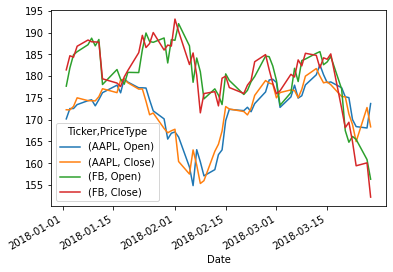

In [72]:
prices.loc[idx['2018-01-01':,:,['Open','Close']]].unstack(['Ticker','PriceType']).plot()

In [73]:
volumes = df[['Volume','Adj. Volume']].stack().rename('Volume')
volumes.index.names = ['Date','Ticker','VolumeType']
volumes

Date        Ticker  VolumeType 
1980-12-12  AAPL    Volume           2093900.0
                    Adj. Volume    117258400.0
1980-12-15  AAPL    Volume            785200.0
                    Adj. Volume     43971200.0
1980-12-16  AAPL    Volume            472000.0
                                      ...     
2018-03-26  FB      Adj. Volume    125438294.0
2018-03-27  AAPL    Volume          38962839.0
                    Adj. Volume     38962839.0
            FB      Volume          76787884.0
                    Adj. Volume     76787884.0
Name: Volume, Length: 21744, dtype: float64

### Reshape back to table-like dataframe: `unstack`

Columns are index-like 

In [76]:
prices.unstack(['Ticker','PriceType'])['FB']#.plot()

PriceType,Open,High,Low,Close,Adj. Open,Adj. High,Adj. Low,Adj. Close
Date,,,,,,,,
1980-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2018-03-21,164.80,173.40,163.30,169.39,164.80,173.40,163.30,169.39
2018-03-22,166.13,170.27,163.72,164.89,166.13,170.27,163.72,164.89
2018-03-23,165.44,167.10,159.02,159.39,165.44,167.10,159.02,159.39


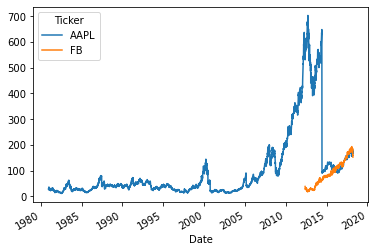

In [77]:
prices.unstack(['PriceType','Ticker'])['Close'].plot()

## Apply functions on `pd` objects

### Column-wise

In [80]:
prices.unstack(['Ticker','PriceType'])

Ticker        AAPL                                                   \
PriceType     Open    High     Low    Close   Adj. Open   Adj. High   
Date                                                                  
1980-12-12   28.75   28.87   28.75   28.750    0.422706    0.424470   
1980-12-15   27.38   27.38   27.25   27.250    0.402563    0.402563   
1980-12-16   25.37   25.37   25.25   25.250    0.373010    0.373010   
1980-12-17   25.87   26.00   25.87   25.870    0.380362    0.382273   
1980-12-18   26.63   26.75   26.63   26.630    0.391536    0.393300   
...            ...     ...     ...      ...         ...         ...   
2018-03-21  175.04  175.09  171.26  171.270  175.040000  175.090000   
2018-03-22  170.00  172.68  168.60  168.845  170.000000  172.680000   
2018-03-23  168.39  169.92  164.94  164.940  168.390000  169.920000   
2018-03-26  168.07  173.10  166.44  172.770  168.070000  173.100000   
2018-03-27  173.68  175.15  166.92  168.340  173.680000  175.150000   

Ticker                                  FB                                    \
PriceType     Adj. Low  Adj. Close    Open    High     Low   Close Adj. Open   
Date                                                                           
1980-12-12    0.422706    0.422706     NaN     NaN     NaN     NaN       NaN   
1980-12-15    0.400652    0.400652     NaN     NaN     NaN     NaN       NaN   
1980-12-16    0.371246    0.371246     NaN     NaN     NaN     NaN       NaN   
1980-12-17    0.380362    0.380362     NaN     NaN     NaN     NaN       NaN   
1980-12-18    0.391536    0.391536     NaN     NaN     NaN     NaN       NaN   
...                ...         ...     ...     ...     ...     ...       ...   
2018-03-21  171.260000  171.270000  164.80  173.40  163.30  169.39    164.80   
2018-03-22  168.600000  168.845000  166.13  170.27  163.72  164.89    166.13   
2018-03-23  164.940000  164.940000  165.44  167.10  159.02  159.39    165.44   
2018-03-26  166.440000  172.770000  160.82  161.10  149.02  160.06    160.82   
2018-03-27  166.920000  168.340000  156.31  162.85  150.75  152.19    156.31   

Ticker                                    
PriceType  Adj. High Adj. Low Adj. Close  
Date                                      
1980-12-12       NaN      NaN        NaN  
1980-12-15       NaN      NaN        NaN  
1980-12-16       NaN      NaN        NaN  
1980-12-17       NaN      NaN        NaN  
1980-12-18       NaN      NaN        NaN  
...              ...      ...        ...  
2018-03-21    173.40   163.30     169.39  
2018-03-22    170.27   163.72     164.89  
2018-03-23    167.10   159.02     159.39  
2018-03-26    161.10   149.02     160.06  
2018-03-27    162.85   150.75     152.19  

[9401 rows x 16 columns]

In [84]:
prices.unstack(['PriceType']).apply(np.mean,axis=1).unstack('Ticker')

Ticker,AAPL,FB
Date,,
1980-12-12,14.601574,NaN
1980-12-15,13.858304,NaN
1980-12-16,12.841064,NaN
1980-12-17,13.141670,NaN
1980-12-18,13.525989,NaN
...,...,...
2018-03-21,173.165000,167.7225
2018-03-22,170.031250,166.2525
2018-03-23,167.047500,162.7375


In [85]:
def price_range(col):
    return col.max() - col.min()
prices.unstack(['Ticker','PriceType']).apply(price_range)

Ticker  PriceType 
AAPL    Open          691.290000
        High          693.950000
        Low           688.570000
        Close         691.100000
        Adj. Open     182.426505
        Adj. High     183.336505
        Adj. Low      180.048269
        Adj. Close    181.558269
FB      Open          173.960000
        High          177.050000
        Low           172.430000
        Close         175.361000
        Adj. Open     173.960000
        Adj. High     177.050000
        Adj. Low      172.430000
        Adj. Close    175.361000
dtype: float64

In [97]:
prices.unstack(['PriceType']).apply(lambda col: col.High-col.Low,axis=1).unstack('Ticker')

Ticker,AAPL,FB
Date,,
1980-12-12,0.12,NaN
1980-12-15,0.13,NaN
1980-12-16,0.12,NaN
1980-12-17,0.13,NaN
1980-12-18,0.12,NaN
...,...,...
2018-03-21,3.83,10.10
2018-03-22,4.08,6.55
2018-03-23,4.98,8.08


In [98]:
prices.unstack(['Ticker','PriceType']).apply(lambda x: (x - np.mean(x)) / np.std(x))

Ticker          AAPL                                                    \
PriceType       Open      High       Low     Close Adj. Open Adj. High   
Date                                                                     
1980-12-12 -0.536270 -0.540015 -0.531647 -0.536307 -0.538530 -0.539388   
1980-12-15 -0.546406 -0.550948 -0.542856 -0.547412 -0.539043 -0.539941   
1980-12-16 -0.561277 -0.565697 -0.557801 -0.562218 -0.539796 -0.540688   
1980-12-17 -0.557578 -0.561074 -0.553168 -0.557628 -0.539608 -0.540454   
1980-12-18 -0.551955 -0.555571 -0.547489 -0.552002 -0.539324 -0.540175   
...              ...       ...       ...       ...       ...       ...   
2018-03-21  0.546060  0.532869  0.533272  0.518770  3.908003  3.873277   
2018-03-22  0.508771  0.515186  0.513395  0.500818  3.779662  3.812392   
2018-03-23  0.496859  0.494935  0.486045  0.471909  3.738664  3.742664   
2018-03-26  0.494492  0.518268  0.497254  0.529874  3.730515  3.823002   
2018-03-27  0.535998  0.533310  0.500841  0.497079  3.873371  3.874793   

Ticker                                 FB                                \
PriceType   Adj. Low Adj. Close      Open      High       Low     Close   
Date                                                                      
1980-12-12 -0.537448  -0.538462       NaN       NaN       NaN       NaN   
1980-12-15 -0.538015  -0.539024       NaN       NaN       NaN       NaN   
1980-12-16 -0.538770  -0.539772       NaN       NaN       NaN       NaN   
1980-12-17 -0.538536  -0.539540       NaN       NaN       NaN       NaN   
1980-12-18 -0.538249  -0.539256       NaN       NaN       NaN       NaN   
...              ...        ...       ...       ...       ...       ...   
2018-03-21  3.849679   3.812210  1.553151  1.701687  1.552987  1.646876   
2018-03-22  3.781370   3.750456  1.580579  1.637513  1.561706  1.554132   
2018-03-23  3.687381   3.651015  1.566350  1.572518  1.464133  1.440777   
2018-03-26  3.725901   3.850408  1.471074  1.449500  1.256529  1.454586   
2018-03-27  3.738228   3.737596  1.378066  1.485380  1.292445  1.292386   

Ticker                                               
PriceType  Adj. Open Adj. High  Adj. Low Adj. Close  
Date                                                 
1980-12-12       NaN       NaN       NaN        NaN  
1980-12-15       NaN       NaN       NaN        NaN  
1980-12-16       NaN       NaN       NaN        NaN  
1980-12-17       NaN       NaN       NaN        NaN  
1980-12-18       NaN       NaN       NaN        NaN  
...              ...       ...       ...        ...  
2018-03-21  1.553151  1.701687  1.552987   1.646876  
2018-03-22  1.580579  1.637513  1.561706   1.554132  
2018-03-23  1.566350  1.572518  1.464133   1.440777  
2018-03-26  1.471074  1.449500  1.256529   1.454586  
2018-03-27  1.378066  1.485380  1.292445   1.292386  

[9401 rows x 16 columns]

### Row-wise

In [99]:
prices.unstack(['Ticker']).apply(lambda x: x.AAPL - x.FB,axis=1)

Date        PriceType 
1980-12-12  Open            NaN
            High            NaN
            Low             NaN
            Close           NaN
            Adj. Open       NaN
                          ...  
2018-03-27  Close         16.15
            Adj. Open     17.37
            Adj. High     12.30
            Adj. Low      16.17
            Adj. Close    16.15
Length: 75208, dtype: float64

## Group By

**Split-Apply-Combine Logic**

https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html


* Splitting the data into groups based on some criteria.

* Applying a function to each group independently.

* Combining the results into a data structure.



In [100]:
prices

Date        Ticker  PriceType 
1980-12-12  AAPL    Open           28.750000
                    High           28.870000
                    Low            28.750000
                    Close          28.750000
                    Adj. Open       0.422706
                                     ...    
2018-03-27  FB      Close         152.190000
                    Adj. Open     156.310000
                    Adj. High     162.850000
                    Adj. Low      150.750000
                    Adj. Close    152.190000
Name: Price, Length: 86976, dtype: float64

In [101]:
prices.groupby(['Ticker','PriceType']).mean()

Ticker  PriceType 
AAPL    Open          101.233437
        High          102.466958
        Low            99.896250
        Close         101.194472
        Adj. Open      21.571019
        Adj. High      21.774929
        Adj. Low       21.351252
        Adj. Close     21.567664
FB      Open           89.486727
        High           90.402976
        Low            88.494512
        Close          89.482903
        Adj. Open      89.486727
        Adj. High      90.402976
        Adj. Low       88.494512
        Adj. Close     89.482903
Name: Price, dtype: float64

In [102]:
prices.groupby([lambda idx:idx[1][0],'PriceType']).mean()

   PriceType 
A  Open          101.233437
   High          102.466958
   Low            99.896250
   Close         101.194472
   Adj. Open      21.571019
   Adj. High      21.774929
   Adj. Low       21.351252
   Adj. Close     21.567664
F  Open           89.486727
   High           90.402976
   Low            88.494512
   Close          89.482903
   Adj. Open      89.486727
   Adj. High      90.402976
   Adj. Low       88.494512
   Adj. Close     89.482903
Name: Price, dtype: float64

In [106]:
prices.groupby([pd.Grouper(level='Date',freq='1W'),'PriceType']).mean()

Date        PriceType 
1980-12-14  Open           28.750000
            High           28.870000
            Low            28.750000
            Close          28.750000
            Adj. Open       0.422706
                             ...    
2018-04-01  Close         163.340000
            Adj. Open     164.720000
            Adj. High     168.050000
            Adj. Low      158.282500
            Adj. Close    163.340000
Name: Price, Length: 15576, dtype: float64

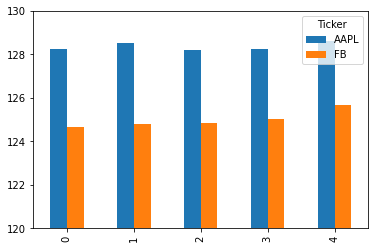

In [110]:
prices.loc[idx['2015-01-01':,:,'Close']].groupby(['Ticker',lambda idx:idx[0].weekday()]).mean().unstack(0).plot.bar(ylim=(120,130))

### Group by and Apply

In [112]:
def get_max_year_range(g,var):
    return g.loc[idx[:,:,var]].max()-g.loc[idx[:,:,var]].min()
prices.groupby([pd.Grouper(level='Date',freq='1Y'),'Ticker']).apply(lambda g: get_max_year_range(g,'Open'))

Date        Ticker
1980-12-31  AAPL       10.630
1981-12-31  AAPL       20.120
1982-12-31  AAPL       22.750
1983-12-31  AAPL       44.870
1984-12-31  AAPL       10.630
1985-12-31  AAPL       15.990
1986-12-31  AAPL       21.630
1987-12-31  AAPL       51.000
1988-12-31  AAPL       11.380
1989-12-31  AAPL       16.000
1990-12-31  AAPL       22.250
1991-12-31  AAPL       31.500
1992-12-31  AAPL       28.000
1993-12-31  AAPL       41.380
1994-12-31  AAPL       18.130
1995-12-31  AAPL       17.000
1996-12-31  AAPL       17.380
1997-12-31  AAPL       15.870
1998-12-31  AAPL       29.870
1999-12-31  AAPL       84.310
2000-12-31  AAPL      128.660
2001-12-31  AAPL       12.200
2002-12-31  AAPL       12.390
2003-12-31  AAPL       11.860
2004-12-31  AAPL       47.580
2005-12-31  AAPL       56.450
2006-12-31  AAPL       41.270
2007-12-31  AAPL      117.590
2008-12-31  AAPL      117.340
2009-12-31  AAPL      133.680
2010-12-31  AAPL      133.850
2011-12-31  AAPL      105.080
2012-12-31  AAPL     

## Merging and joining datasets
https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

* `pd.concat` - vertical alignment (along index)
* `pd.merge` - horizontal alignment (along columns, by )
    * `df.join` - merge on index


### Concatenate

![Concatenating schema](./img/concat.png)

In [ ]:
pd.concat([fb,apl])

### Merge
![Concatenating schema](./img/merge.png)

In [113]:
pd.merge(
    left=prices.unstack('PriceType'),
    right=volumes.unstack('VolumeType'),
    right_index=True,left_index=True
)

Open    High     Low   Close   Adj. Open   Adj. High  \
Date       Ticker                                                           
1980-12-12 AAPL     28.75   28.87   28.75   28.75    0.422706    0.424470   
1980-12-15 AAPL     27.38   27.38   27.25   27.25    0.402563    0.402563   
1980-12-16 AAPL     25.37   25.37   25.25   25.25    0.373010    0.373010   
1980-12-17 AAPL     25.87   26.00   25.87   25.87    0.380362    0.382273   
1980-12-18 AAPL     26.63   26.75   26.63   26.63    0.391536    0.393300   
...                   ...     ...     ...     ...         ...         ...   
2018-03-23 FB      165.44  167.10  159.02  159.39  165.440000  167.100000   
2018-03-26 AAPL    168.07  173.10  166.44  172.77  168.070000  173.100000   
           FB      160.82  161.10  149.02  160.06  160.820000  161.100000   
2018-03-27 AAPL    173.68  175.15  166.92  168.34  173.680000  175.150000   
           FB      156.31  162.85  150.75  152.19  156.310000  162.850000   

                     Adj. Low  Adj. Close       Volume  Adj. Volume  
Date       Ticker                                                    
1980-12-12 AAPL      0.422706    0.422706    2093900.0  117258400.0  
1980-12-15 AAPL      0.400652    0.400652     785200.0   43971200.0  
1980-12-16 AAPL      0.371246    0.371246     472000.0   26432000.0  
1980-12-17 AAPL      0.380362    0.380362     385900.0   21610400.0  
1980-12-18 AAPL      0.391536    0.391536     327900.0   18362400.0  
...                       ...         ...          ...          ...  
2018-03-23 FB      159.020000  159.390000   52306891.0   52306891.0  
2018-03-26 AAPL    166.440000  172.770000   36272617.0   36272617.0  
           FB      149.020000  160.060000  125438294.0  125438294.0  
2018-03-27 AAPL    166.920000  168.340000   38962839.0   38962839.0  
           FB      150.750000  152.190000   76787884.0   76787884.0  

[10872 rows x 10 columns]

### Join

In [114]:
prices.unstack('PriceType').join(volumes.unstack('VolumeType'))

Open    High     Low   Close   Adj. Open   Adj. High  \
Date       Ticker                                                           
1980-12-12 AAPL     28.75   28.87   28.75   28.75    0.422706    0.424470   
1980-12-15 AAPL     27.38   27.38   27.25   27.25    0.402563    0.402563   
1980-12-16 AAPL     25.37   25.37   25.25   25.25    0.373010    0.373010   
1980-12-17 AAPL     25.87   26.00   25.87   25.87    0.380362    0.382273   
1980-12-18 AAPL     26.63   26.75   26.63   26.63    0.391536    0.393300   
...                   ...     ...     ...     ...         ...         ...   
2018-03-23 FB      165.44  167.10  159.02  159.39  165.440000  167.100000   
2018-03-26 AAPL    168.07  173.10  166.44  172.77  168.070000  173.100000   
           FB      160.82  161.10  149.02  160.06  160.820000  161.100000   
2018-03-27 AAPL    173.68  175.15  166.92  168.34  173.680000  175.150000   
           FB      156.31  162.85  150.75  152.19  156.310000  162.850000   

                     Adj. Low  Adj. Close       Volume  Adj. Volume  
Date       Ticker                                                    
1980-12-12 AAPL      0.422706    0.422706    2093900.0  117258400.0  
1980-12-15 AAPL      0.400652    0.400652     785200.0   43971200.0  
1980-12-16 AAPL      0.371246    0.371246     472000.0   26432000.0  
1980-12-17 AAPL      0.380362    0.380362     385900.0   21610400.0  
1980-12-18 AAPL      0.391536    0.391536     327900.0   18362400.0  
...                       ...         ...          ...          ...  
2018-03-23 FB      159.020000  159.390000   52306891.0   52306891.0  
2018-03-26 AAPL    166.440000  172.770000   36272617.0   36272617.0  
           FB      149.020000  160.060000  125438294.0  125438294.0  
2018-03-27 AAPL    166.920000  168.340000   38962839.0   38962839.0  
           FB      150.750000  152.190000   76787884.0   76787884.0  

[10872 rows x 10 columns]

## Time-series 

In [ ]:
prices.loc[idx[:,:,'Close']].unstack('Ticker').apply(lambda x:x.diff()/x.shift(1))#.pct_change()

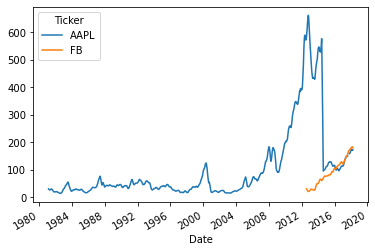

In [117]:
prices.loc[idx[:,:,'Close']].unstack('Ticker').rolling(50).mean().plot()#.apply(lambda x:x.iloc[4]-x.iloc[0])

In [ ]:
prices.loc[idx[:,:,'Close']].unstack('Ticker').apply(lambda x: pd.Series({'return':x.pct_change(),'MA_5':x.rolling(5).mean()}))

## Missing values

## Input-Output

In [ ]:
?pd.read_csv

In [ ]:
?prices.to

## Plotting with Matplotlib